# k-nearest neighbors

# Q1. k-nearest neightbors を用いたクラス分類について調べ、<br>そのアルゴリズムについて説明せよ。

# A1. 

## k-nearest neightborsとは

- n次元空間に存在するデータを使い新しいデータにラベル名をつける教師あり学習である。  
- n次元空間に存在するデータはラベル(データ名)と位置情報を元に領域が分かれている。  
- n次元空間に新しくラベルを持たないデータを入れた時、  
  新しいデータから最も近いk個のデータを見つけ、多数決により新しいデータのラベル名を決める。  
  
以上が、  
k-nearest neightborsを用いたクラス分類である。  

引用：https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95

<img src="images/k-nn.png">


# k-nearest neightborsのアルゴリズムについて

k-nearest neightborsを解く為に必要な手順は以下。    
**1. 新しく入るデータと既存データとの距離の測り方**  
**2. 新しいデータが所属するグループを決める方法**  
**3. k個のデータ数を決める方法**  

1,2,3を解決することでk-nearest neightborsの問題を解くことができる。

## 1. 新しく入るデータと既存データとの距離の測り方

距離の測り方の一つにユーグリット距離がある。  
**ユーグリット距離とは**次元空間において二点間を最短距離で線形に測る方法。  
以下の図にある様に**二次元**の場合の距離の測り方は  
<img src="images/euclidean_1.png">

n次元になると以下の様にして求めることができる。
<img src="images/euclidean_2.png">

<img src="images/euclidean.png">

引用：https://ja.wikipedia.org/wiki/%E3%83%A6%E3%83%BC%E3%82%AF%E3%83%AA%E3%83%83%E3%83%89%E8%B7%9D%E9%9B%A2

## 2. 新しいデータが付けるラベルを決める方法

- 新しいデータ点を入れた場所からユーグリット距離を測る。  
- 新しいデータ点から最も近いk個のデータが持つラベルの最も多いグループのラベル名を付ける。  
この時、k個の個数だけに依存しており、選ばれたk個それぞれが新しいデータ点からの距離には意味を持たない。

## 3. k個のデータ数を決める方法

- k個の数を決める方法は既存データの数に依存する。  
- 指定する方法のひとつに、既存データ数の平方根をとり求めた数を使う。  
- 何パターンかkの個数を変えて学習させ、検証結果の精度で判断する。  

# Q2. 上述のアルゴリズムを Numpy を用いて実装し、Iris データに適用せよ。

# A2. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

In [2]:
iris.target  # irisデータセットのラベルを確認

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.feature_names  # irisデータセットに記載されているデータの名前

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# irisデータをdataframeへ(カラム名はデータセットについている花弁とガクの長さと幅)
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
df["label"] = iris.target  # irisデータセットにあるラベルを列を追加

In [5]:
df = df.sample(frac=1).reset_index(drop=True)  # irisデータをシャッフルし、インデックスを0から順に直す

In [6]:
df.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.0,2.0,3.5,1.0,1
1,5.1,3.5,1.4,0.3,0
2,7.2,3.2,6.0,1.8,2
3,5.7,2.5,5.0,2.0,2
4,4.9,3.0,1.4,0.2,0


In [7]:
df.shape

(150, 5)

In [8]:
dist = scipy.spatial.distance.pdist(df, metric='euclidean')

In [9]:
150*149/2

11175.0

In [10]:
len(scipy.spatial.distance.pdist(df, metric='euclidean'))

11175

In [11]:
"""全データがそれぞれのデータ対しての距離を出す(150 x 150 種類)"""
square_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(df, metric='euclidean'))  # 正方行列取得(対角成分も含まれる)
square_matrix[0]

array([0.        , 2.85657137, 3.76430604, 2.23383079, 2.65706605,
       3.1144823 , 2.88270706, 2.91547595, 1.42126704, 0.91651514,
       4.42492938, 2.08566536, 2.85306852, 2.73495887, 0.88317609,
       4.67974358, 2.65329983, 2.40416306, 0.82462113, 2.22710575,
       2.67768557, 2.90860791, 2.69443872, 3.23264598, 1.61554944,
       2.67207784, 3.15753068, 1.89208879, 2.32594067, 3.17332633,
       2.73861279, 2.07846097, 1.72626765, 2.75862284, 2.75680975,
       2.58263431, 2.65141472, 2.39374184, 1.2083046 , 3.40734501,
       2.83196045, 2.9563491 , 2.78208555, 2.96479342, 4.69680743,
       2.54950976, 2.68700577, 2.57487864, 3.03644529, 2.93428015,
       2.60768096, 2.89309523, 2.44948974, 1.6583124 , 3.07733651,
       0.45825757, 1.22065556, 2.93598365, 2.87749891, 2.83725219,
       3.94715087, 3.62353419, 1.65227116, 2.47790234, 2.27596134,
       1.13578167, 2.41039416, 3.53411941, 2.14009346, 2.87228132,
       2.8       , 2.03715488, 0.36055513, 2.40624188, 3.31360

In [12]:
for i in range(150):
    label = 'distance_%s' % i
    df[label] = square_matrix[i]

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,distance_0,distance_1,distance_2,distance_3,distance_4,...,distance_140,distance_141,distance_142,distance_143,distance_144,distance_145,distance_146,distance_147,distance_148,distance_149
0,5.0,2.0,3.5,1.0,1,0.000000,2.856571,3.764306,2.233831,2.657066,...,1.126943,3.337664,1.824829,2.968164,2.632489,1.870829,1.489966,2.308679,3.257299,3.559494
1,5.1,3.5,1.4,0.3,0,2.856571,0.000000,5.648894,4.605432,0.547723,...,2.729469,0.812404,3.766962,4.990992,0.264575,3.529873,3.529873,4.343961,0.655744,5.470832
2,7.2,3.2,6.0,1.8,2,3.764306,5.648894,0.000000,1.944222,5.748913,...,3.108054,5.622277,2.102380,0.948683,5.495453,2.206808,2.431049,1.708801,6.203225,0.916515
3,5.7,2.5,5.0,2.0,2,2.233831,4.605432,1.944222,0.000000,4.592385,...,1.902630,4.809366,1.407125,1.067708,4.406813,1.621727,1.352775,0.648074,5.065570,1.542725
4,4.9,3.0,1.4,0.2,0,2.657066,0.547723,5.748913,4.592385,0.000000,...,2.747726,1.341641,3.790778,5.062608,0.500000,3.588872,3.535534,4.396590,0.781025,5.577634


In [14]:
label_dict = {}
for j in range(150):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = df.sort_values(by=sort_label)[1:6]['label']

In [15]:
label_dict['distance_1']  # 自分自身を除く一番近いラベル5個をそれぞれ取得 , 例として'distance_1'を表示

6      0
138    0
49     0
33     0
59     0
Name: label, dtype: int64

In [16]:
from collections import Counter

In [17]:
list(Counter(label_dict['distance_1']))[0]

0

In [18]:
prediction_result = {}
for v in range(150):
    predict_label = 'distance_%s' % v
    prediction_result[v] = list(Counter(label_dict[predict_label]))[0]

In [19]:
df["pred_label"] = prediction_result.values()  # 予測値をdfにラベルを付けて含める

In [20]:
comparison_value = 0
for pred, correct in zip(prediction_result.values(), df['label']):
    comparison_value+= abs(pred - correct)
comparison_value   # 比較した結果　間違いはなし！？

0

In [29]:
pd.set_option('display.max_rows', 150)  # 行を0~149まで全て表示

In [28]:
df.loc[:,['label','pred_label']]  # 'label'=正解ラベル、 'pred_label'=予測ラベル　

# 全て一致している。

,label,pred_label
0,1,1
1,0,0
2,2,2
3,2,2
4,0,0
5,2,2
6,0,0
7,0,0
8,1,1
9,1,1


In [22]:
df_correct_answer_0 = df.groupby('label').get_group(0)
df_correct_answer_1 = df.groupby('label').get_group(1)
df_correct_answer_2 = df.groupby('label').get_group(2)

df_prediction_0 = df.groupby('pred_label').get_group(0)
df_prediction_1 = df.groupby('pred_label').get_group(1)
df_prediction_2 = df.groupby('pred_label').get_group(2)

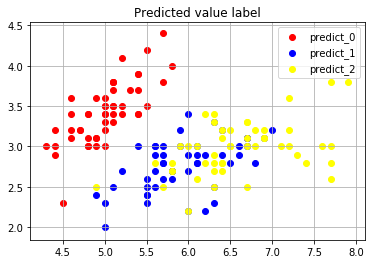

In [23]:
# x = np.random.rand(100)
# y = np.random.rand(100)
# x = df["sepal length (cm)"]
# y = df["sepal width (cm)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Predicted value label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_prediction_0["sepal length (cm)"], df_prediction_0["sepal width (cm)"], c='red', label='predict_0')
ax.scatter(df_prediction_1["sepal length (cm)"], df_prediction_1["sepal width (cm)"], c='blue', label='predict_1')
ax.scatter(df_prediction_2["sepal length (cm)"], df_prediction_2["sepal width (cm)"], c='yellow', label='predict_2')

ax.grid(True)
ax.legend(loc='upper right')

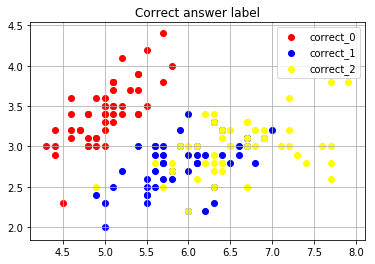

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Correct answer label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_correct_answer_0["sepal length (cm)"], df_correct_answer_0["sepal width (cm)"], c='red', label='correct_0')
ax.scatter(df_correct_answer_1["sepal length (cm)"], df_correct_answer_1["sepal width (cm)"], c='blue', label='correct_1')
ax.scatter(df_correct_answer_2["sepal length (cm)"], df_correct_answer_2["sepal width (cm)"], c='yellow', label='correct_2')

ax.grid(True)
ax.legend(loc='upper right')

# 上記で使われているアルゴリズムは正しく動いているかをテスト
<img src="images/test1.png">

## ユーグリット距離の計算は間違えていないか？
**scipy.spatial.distance.squareform(scipy.spatial.distance.pdist()** このモジュールを利用している

In [58]:
# ソースコードで上記計算を実行してみる
test_input = pd.DataFrame(data=([[1,2], [3,4], [5,6]]), columns=('A','B'))

In [60]:
test_input

,A,B
0,1,2
1,3,4
2,5,6


In [61]:
test_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(test_input, metric='euclidean'))

In [62]:
test_matrix
# 計算結果は間違ってはいないことがわかった。

array([[0.        , 2.82842712, 5.65685425],
       [2.82842712, 0.        , 2.82842712],
       [5.65685425, 2.82842712, 0.        ]])

## 最小値のk個を正しく選べているか？

In [108]:
# for文でソートした後、値0を除く3個を取得させます。

test_input = pd.DataFrame(data=([[1,2, 0], [3,4, 1], [5,6, 2], [1,1.5, 0], [2.5,3, 1], [6,9, 2], [0.5,1, 0], [2.7,3.5, 1], [8,10, 2]]), columns=('A','B', 'label'))
test_input.loc[:,['A','B']]  # labelカラムを除く
test_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(test_input, metric='euclidean'))
for i in range(3):
    label = 'distance_%s' % i
    test_input[label] = test_matrix[i]
    
label_dict = {}
for j in range(3):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = test_input.sort_values(by=sort_label)[1:4]['label']

In [100]:
test_input

,A,B,label,distance_0,distance_1,distance_2
0,1.0,2.0,0,0.000000,3.000000,6.000000
1,3.0,4.0,1,3.000000,0.000000,3.000000
2,5.0,6.0,2,6.000000,3.000000,0.000000
3,1.0,1.5,0,0.500000,3.354102,6.344289
4,2.5,3.0,1,2.061553,1.118034,4.031129
5,6.0,9.0,2,8.831761,5.916080,3.162278
6,0.5,1.0,0,1.118034,4.031129,7.017834
7,2.7,3.5,1,2.477902,0.583095,3.541186
8,8.0,10.0,2,10.816654,7.874008,5.000000


In [107]:
print("各列が値0を除く、最小3個を選択しているか確認\n(行、label名)\n")

print("distance_0列\n", label_dict['distance_0'])
print("\n distance_1列\n", label_dict['distance_1'])
print("\n distance_2列\n", label_dict['distance_2'])

各列が値0を除く、最小3個を選択しているか確認
(行、label名)

distance_0列
 3    0
6    0
4    1
Name: label, dtype: int64

 distance_1列
 7    1
4    1
0    0
Name: label, dtype: int64

 distance_2列
 1    1
5    2
7    1
Name: label, dtype: int64


## 選ばれたリストの中で多数決を正しく出来ているか？